In [1]:
from pathlib import Path
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.data_sources.csv_dataset_repository import CSVDatasetRepository 

# Configure logging
configure_logging(env="dev")

# Get repository root path
root = get_repository_root()

# Load configuration
config_loader = YamlConfigLoader()
paths = config_loader.load_config(f"{root}/configs/paths.yaml")
train_paths = get_repository_root() / Path(paths["data"]["input"]["train_dataset"])

# Initialize Logger
logger = LoguruLogger()

# Load Dataset fron CSV file
csv_repo = CSVDatasetRepository(logger=logger,source_path=train_paths) 

# Lit le fichier CSV et le charge en mémoire (DataFrame Pandas).
data = csv_repo.load_dataset()

# Show the 5 first rows
display(data.head()) # Affiche les 5 premières lignes pour validation.
print(f"le dataset chargé a {data.shape[0]} lignes et {data.shape[1]} colonnes")

2025-12-26 18:18:39 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-26 18:18:39 | INFO     | csv_dataset_repository.py:56 | load_dataset() | Chargement du dataset depuis : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/data/input/train.csv | {}
2025-12-26 18:18:39 | INFO     | csv_dataset_repository.py:63 | load_dataset() | Dataset chargé avec succès (77837 lignes, 31 colonnes). | {}


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,48,92,131,85,104,7.59,5.21,24.6,Type 2,1
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Former,2,345,6.4,...,41,127,186,109,187,12.01,6.75,25.0,Type 2,1
2,22,Other,Other,Postgraduate,Middle,Retired,Never,3,206,5.6,...,41,95,124,112,151,9.69,6.36,16.8,Pre-Diabetes,0
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,41,204,79,113,129,18.75,5.75,40.9,Pre-Diabetes,0
4,58,Female,White,Highschool,Lower-Middle,Unemployed,Never,3,152,4.2,...,46,61,92,101,162,9.11,6.52,28.8,Type 2,1


le dataset chargé a 77837 lignes et 31 colonnes


In [2]:
from health_lifestyle_diabetes.infrastructure.feature_engineering.pipeline_feature_engineering import FeatureEngineeringPipeline

pipeline = FeatureEngineeringPipeline(logger=LoguruLogger())
df_enriched = pipeline.transform(data)

# Affiche les 5 premières lignes du dataset enrichi pour validation.
display(df_enriched.head())
print(f"Le dataset d'entrainement initial avait {data.shape[1]} colonnes")
print(f"Le dataset d'entrainement fianla apres FE a desormais {df_enriched.shape[1]} colonnes")

2025-12-26 18:18:39 | INFO     | pipeline_feature_engineering.py:82 | transform() | Démarrage du pipeline complet de Feature Engineering... | {}
2025-12-26 18:18:39 | INFO     | exclusion.py:36 | drop_leakage_columns() | Vérification des colonnes à risque de data leakage... | {}
2025-12-26 18:18:39 | INFO     | exclusion.py:40 | drop_leakage_columns() | Suppression des colonnes à risque de leakage : ['diabetes_stage', 'diabetes_risk_score'] | {}
2025-12-26 18:18:39 | INFO     | base_preprocessing.py:25 | clean_categorical_variables() | Nettoyage des variables catégorielles... | {}
2025-12-26 18:18:39 | INFO     | base_preprocessing.py:32 | clean_categorical_variables() | Libellés uniformisés avec succès. | {}
2025-12-26 18:18:39 | INFO     | demographics_features.py:82 | transform() | Création des variables démographiques... | {}
2025-12-26 18:18:39 | INFO     | demographics_features.py:68 | _create_age_group() | Utilisation du découpage d'âge en 3 catégories. | {}
2025-12-26 18:18:39 

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,19,1878.5,0,0,1.411765,0.553333,1.136986,1,4,0.784946
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Ex-Smoker,2,345,6.4,...,78,4011.2,1,2,1.859375,2.300000,0.369565,0,6,1.703704
2,22,Unknown,Other,Postgraduate,Middle,Inactive,Never,3,206,5.6,...,39,2844.8,0,1,1.384615,1.373333,0.714286,0,6,1.184615
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,16,3412.6,0,3,2.157143,0.486667,0.913043,1,6,0.945205
4,58,Female,White,Highschool,Lower-Middle,Inactive,Never,3,152,4.2,...,61,2373.5,0,0,1.265957,1.013333,1.291667,0,6,0.699029


Le dataset d'entrainement initial avait 31 colonnes
Le dataset d'entrainement fianla apres FE a desormais 52 colonnes


In [3]:
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.splitters.sklearn_splitter import SklearnDatasetSplitter

# Load configuration
config_loader = YamlConfigLoader()
cfg = config_loader.load_config(f"{get_repository_root()}/configs/splitter.yaml")
print(f"Splitter configuration: {cfg['splitter']}")

logger = LoguruLogger()

splitter = SklearnDatasetSplitter(
    train_size=cfg["splitter"]["train_size"],
    target_column=cfg["splitter"]["target_column"],
    random_state=cfg["splitter"]["random_state"],
    logger=logger,
)
train_df_enriched, valid_df_enriched = splitter.split(df_enriched)
print("Dataset successfully split into training and validation sets.\n")
print(f"Train set shape: {train_df_enriched.shape}")
print(f"Validation set shape: {valid_df_enriched.shape}")

Splitter configuration: {'train_size': 0.8, 'target_column': 'diagnosed_diabetes', 'random_state': 42}
2025-12-26 18:18:41 | DEBUG    | sklearn_splitter.py:37 | __init__() | SklearnDatasetSplitter initialized | {}
2025-12-26 18:18:41 | INFO     | sklearn_splitter.py:42 | split() | Starting dataset split | {}
Dataset successfully split into training and validation sets.
2025-12-26 18:18:41 | INFO     | sklearn_splitter.py:57 | split() | Split done | train=(62269, 52) | test=(15568, 52) | {}

Train set shape: (62269, 52)
Validation set shape: (15568, 52)


In [4]:
# Étape 4.1 : Répartition finale des datasets
print("Étape 4.1 : Répartition finale des lignes du dataset :")
print(f"- Entraînement final (train_df_enriched) : {train_df_enriched.shape[0]} lignes")
print(f"- Validation (valid_df_enriched) : {valid_df_enriched.shape[0]} lignes")


print("*" * 100)

# Étape 5.1 : Définition de la variable cible
TARGET = cfg["splitter"]["target_column"]

# Étape 5.2 : Création des matrices X (features) et des vecteurs y (target) pour chaque set
# Pour l'entraînement final
X_train = train_df_enriched.drop(columns=[TARGET])
y_train = train_df_enriched[TARGET]

# Pour la validation
X_valid = valid_df_enriched.drop(columns=[TARGET])
y_valid = valid_df_enriched[TARGET]

# Affichage des dimensions des matrices et vecteurs
print("Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :")
print(f"- X_train (Features d'entraînement) : {X_train.shape[0]} lignes, {X_train.shape[1]} colonnes")
print(f"- X_valid (Features de validation)  : {X_valid.shape[0]} lignes, {X_valid.shape[1]} colonnes")

print("\nÉtape 5.4 : Vérification des vecteurs cibles (y) :")
print(f"- y_train : {y_train.shape[0]} lignes")
print(f"- y_valid : {y_valid.shape[0]} lignes")

Étape 4.1 : Répartition finale des lignes du dataset :
- Entraînement final (train_df_enriched) : 62269 lignes
- Validation (valid_df_enriched) : 15568 lignes
****************************************************************************************************
Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :
- X_train (Features d'entraînement) : 62269 lignes, 51 colonnes
- X_valid (Features de validation)  : 15568 lignes, 51 colonnes

Étape 5.4 : Vérification des vecteurs cibles (y) :
- y_train : 62269 lignes
- y_valid : 15568 lignes


In [5]:
import matplotlib.pyplot as plt

def plot_metrics_bar(metrics: dict, title: str = "Model Evaluation Metrics"):
    """
    Plot simple en barres des métriques avec valeur annotée.
    """
    keys = list(metrics.keys())
    values = list(metrics.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(keys, values, color="#007bff", alpha=0.85)

    # Rotation des labels pour lisibilité
    plt.xticks(rotation=0)

    # Affichage des valeurs au-dessus des barres
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

    plt.title(title)
    plt.ylabel("Score")
    plt.ylim(0, max(values) + 0.05)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

2025-12-26 18:18:42 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-26 18:18:42 | DEBUG    | mlflow_setup.py:36 | __init__() | Tracking URI : sqlite://///Users/surelmanda/Downloads/ml-projects/mlflow_central/db/mlruns.db | {}
2025-12-26 18:18:42 | DEBUG    | mlflow_setup.py:37 | __init__() | Artifact URI : /Users/surelmanda/Downloads/ml-projects/mlflow_central/mlflow_artifacts | {}


2025/12/26 18:18:43 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/26 18:18:43 INFO mlflow.store.db.utils: Updating database tables
2025/12/26 18:18:43 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/26 18:18:43 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/26 18:18:43 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/26 18:18:43 INFO alembic.runtime.migration: Will assume non-transactional DDL.


Starting experiment 'health_lifestyle_diabetes' with run name 'CatBoost'2025-12-26 18:18:43 | INFO     | mlflow_setup.py:53 | configure() | MLflow configuré avec succès. | {}

2025-12-26 18:18:43 | INFO     | mlflow_tracker.py:25 | __init__() | MLflowExperimentTracker prêt. | {}
2025-12-26 18:18:43 | INFO     | experiment_tracking_service.py:23 | __init__() | ExperimentTrackingService initialisé. | {}
2025-12-26 18:18:43 | INFO     | experiment_tracking_service.py:30 | start_experiment() | Initialisation de l'expérience 'health_lifestyle_diabetes' (run='CATB_2025-12-26_18h18m43s') | {}
2025-12-26 18:18:43 | INFO     | mlflow_tracker.py:56 | setup_experiment() | Expérience active : health_lifestyle_diabetes | {}
2025-12-26 18:18:43 | INFO     | mlflow_tracker.py:70 | start_run() | Run démarrée : CATB_2025-12-26_18h18m43s | {}
2025-12-26 18:18:43 | DEBUG    | experiment_tracking_service.py:43 | log_training_context() | Enregistrement du contexte d'entraînement pour CatBoost | {}
2025-12-

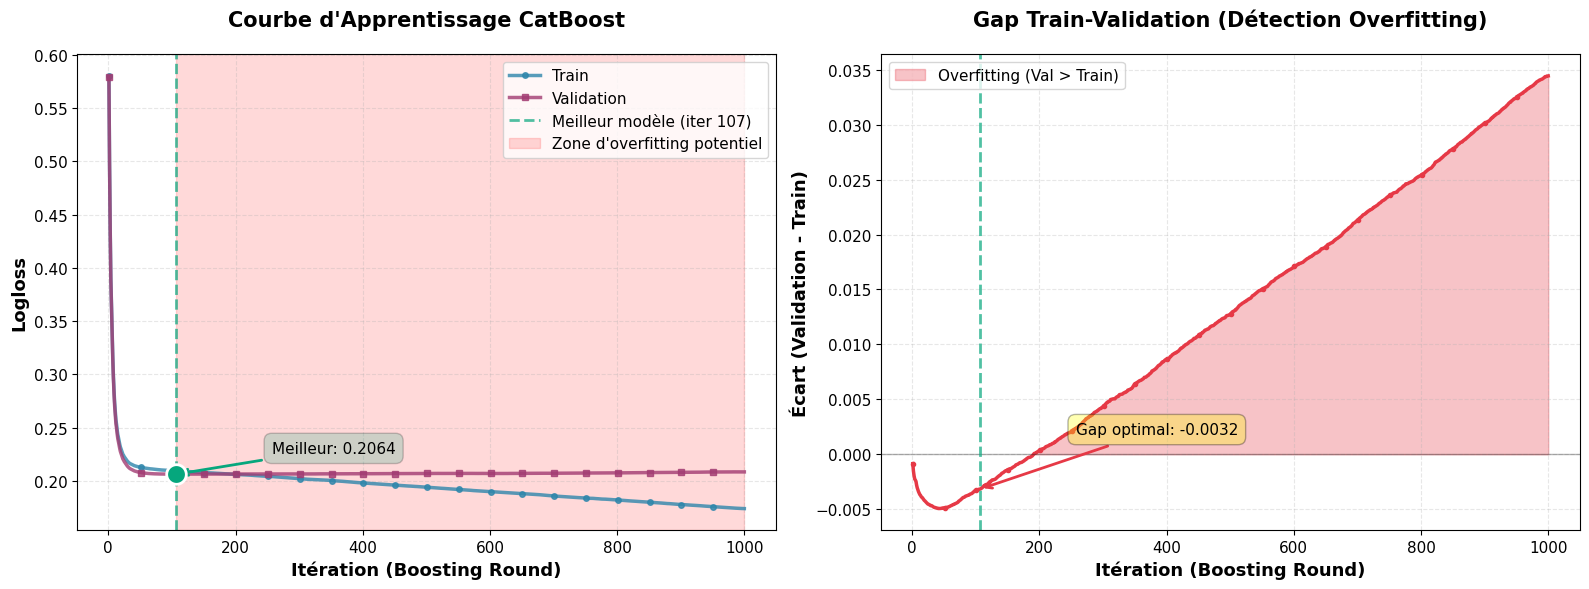

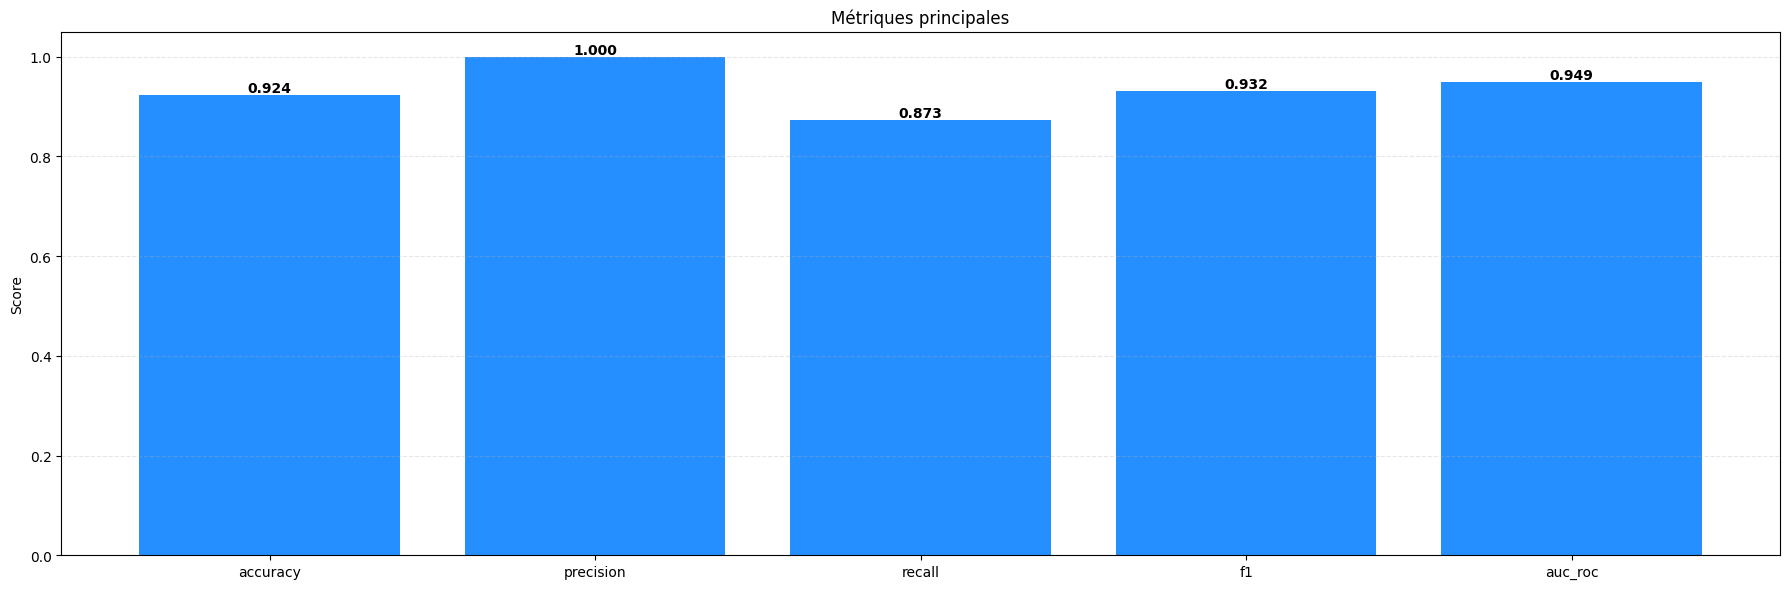

2025-12-26 18:19:26 | INFO     | experiment_tracking_service.py:48 | log_evaluation() | Métriques d'évaluation : {'accuracy': 0.9238, 'precision': 1.0, 'recall': 0.8729, 'f1': 0.9322, 'auc_roc': 0.9489} | {}
2025-12-26 18:19:26 | DEBUG    | mlflow_tracker.py:87 | log_metrics() | Métriques enregistrées : {'accuracy': 0.9238, 'precision': 1.0, 'recall': 0.8729, 'f1': 0.9322, 'auc_roc': 0.9489} | {}
2025-12-26 18:19:26 | INFO     | experiment_tracking_service.py:61 | close() | Fermeture de l'expérience. | {}
2025-12-26 18:19:26 | INFO     | mlflow_tracker.py:76 | end_run() | Fermeture de la run : 05e800b5030b425bb6f10488336f08d3 | {}

Exécution terminée. Vérifier MLflow UI.


In [ ]:
# ============================================================
# 0) Imports - Dépendances Clean Architecture
# ============================================================
from fastapi import params
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.tracking.mlflow_tracker import MLflowExperimentTracker
from health_lifestyle_diabetes.application.services.experiment_tracking_service import ExperimentTrackingService
from health_lifestyle_diabetes.infrastructure.tracking.run_name_generator import generate_run_name
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)
from health_lifestyle_diabetes.infrastructure.training_diagnostics.diagnostics import (
    BoostingTrainingDiagnostics,
)

# ============================================================
# 1.) Config log + injection dépendances
# ============================================================
configure_logging(env="dev")

logger = LoguruLogger()
tracker = MLflowExperimentTracker(logger=logger)
tracking_service = ExperimentTrackingService(tracker=tracker, logger=logger)

# ============================================================
# 2.) Démarrer une expérience CatBoost dans MLflow
# ============================================================
EXPERIMENT_NAME = "health_lifestyle_diabetes"
RUN_NAME = generate_run_name(prefix="CATB")
MODEL_NAME = "CatBoost"
print(f"Starting experiment '{EXPERIMENT_NAME}' with run name '{MODEL_NAME}'")


tracking_service.start_experiment(
    experiment_name=EXPERIMENT_NAME,
    run_name=RUN_NAME
)

# ============================================================
# 4) Définition du modèle + log des paramètres
# ============================================================
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 1000,
    "learning_rate": 0.05,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "Logloss",  #"AUC"
    "verbose": 100,   # ← test du verbose
}
# Tracking des paramètres sur l'expérience mlflow
tracking_service.log_training_context(model_name=MODEL_NAME, params=catboost_params)
# =========================
# Entraînement
# =========================
trainer = CatBoostTrainer(params=catboost_params,logger=logger)
model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)


# ============================================================
# 5.) Plot des diagnostics d'entraînement
# ============================================================
diagnostics = BoostingTrainingDiagnostics(
    model=model,
    model_name=MODEL_NAME,
    run_name=RUN_NAME,
)

diagnostics.run(
    backend="matplotlib",  # "matplotlib" ou "plotly"
    save_figure=True,
)

# ============================================================
# 6.) Évaluation du modèle sur le jeu de validation
# ============================================================
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.domain.services.evaluation_service import EvaluationService

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

# Évaluation
results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
extra = results.extra_metrics or {}
main = {k: extra[k] for k in ["accuracy", "precision", "recall", "f1", "auc_roc"] if k in extra}
plot_metrics_bar(main, "Métriques principales")

# Log evaluation metrics
tracking_service.log_evaluation(main)

# ============================================================
# 7.) Fin de l'expérience
# ============================================================
tracking_service.close()

print("\nExécution terminée. Vérifier MLflow UI.")

In [ ]:
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import CalibrationService
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

logger = LoguruLogger()

# 1) INJECTION
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

# 2) CALIBRAGE
calibrated_model = calibration_service.calibrate_model(
    model=model,       # ton modèle déjà entraîné !
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",
    cv=5,
    ensemble="auto",
)

# 3) UTILISATION
#y_proba_calibrated = calibrated_model.predict_proba(X_test)[:, 1]